In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [37]:
# Hàm để tạo tập dữ liệu từ thư mục imgs
def create_dataset(img_folder):
    img_data = []
    labels = []
    for filename in os.listdir(img_folder):
        if filename.endswith(".png"):
            img = Image.open(os.path.join(img_folder, filename))
            img_array = np.array(img)
            img_data.append(img_array)
            label = int(filename[3])
            labels.append(label)
    return img_data, labels



In [39]:
#Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [15]:
#b1. Đọc ảnh từ file đã lưu, dùng open cv
#img=cv2.imread('img1.jpg')

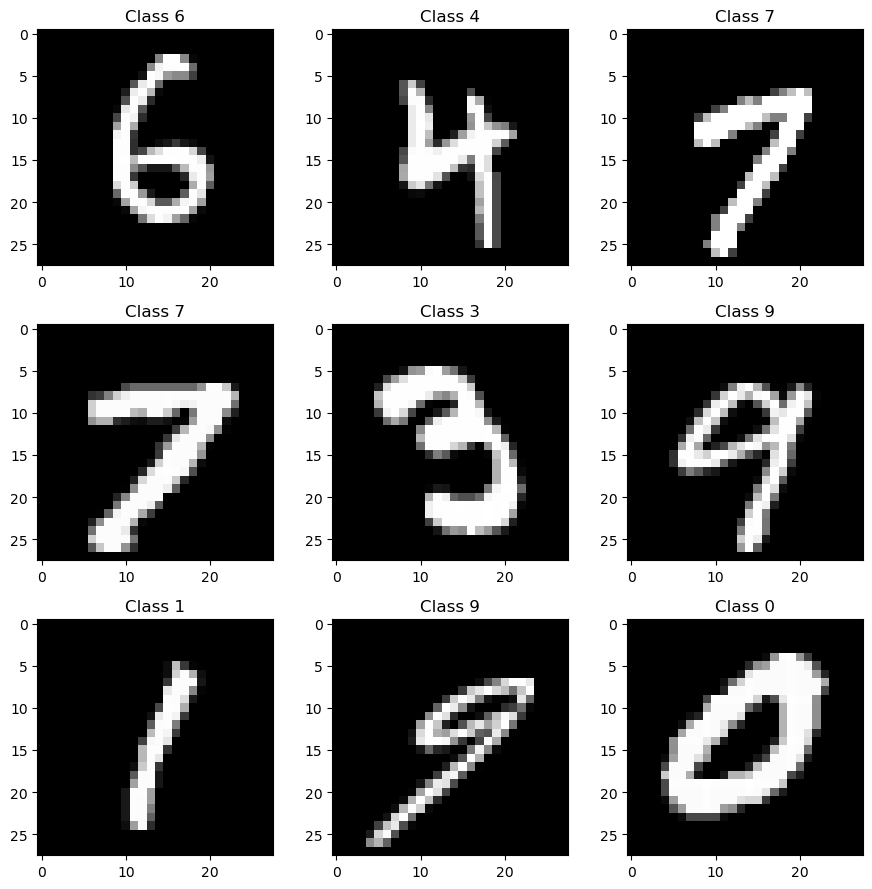

In [40]:
# Visualize some random images from the dataset
plt.rcParams['figure.figsize'] = (9, 9)
for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [41]:
# Reshape and preprocess the data
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [42]:
# One-hot encode the labels
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [43]:
#Đọc hình ảnh và nhãn từ thư mục 'imgs'
img_data, labels = create_dataset('imgs')

# Chuyển đổi danh sách hình ảnh và nhãn thành mảng numpy
img_data = np.array(img_data)
labels = np.array(labels)

# Reshape hình ảnh để phù hợp với định dạng của tập dữ liệu MNIST
img_data = img_data.reshape(len(img_data), 784)

# Chia tỷ lệ hình ảnh để giá trị pixel nằm trong khoảng từ 0 đến 1
img_data = img_data.astype('float32') / 255

# One-hot encode nhãn
labels = np_utils.to_categorical(labels, nb_classes)

In [45]:
# Kết hợp tập dữ liệu mới với tập dữ liệu MNIST
X_train = np.concatenate((X_train, img_data))
Y_train = np.concatenate((Y_train, labels))

In [ ]:
# Build and train the Dense model
model_dense = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.fit(X_train, Y_train, batch_size=128, epochs=12, verbose=1)

# Save the Dense model
model_dense.save('dense_model.h5')

Epoch 1/12
477/477 [==============================] - 4s 7ms/step - loss: 0.2789 - accuracy: 0.9143
Epoch 2/12
477/477 [==============================] - 3s 7ms/step - loss: 0.1229 - accuracy: 0.9629
Epoch 3/12
477/477 [==============================] - 3s 7ms/step - loss: 0.0853 - accuracy: 0.9736
Epoch 4/12
477/477 [==============================] - 4s 7ms/step - loss: 0.0652 - accuracy: 0.9786
Epoch 5/12
477/477 [==============================] - 4s 7ms/step - loss: 0.0541 - accuracy: 0.9827
Epoch 6/12
477/477 [==============================] - 4s 7ms/step - loss: 0.0432 - accuracy: 0.9860
Epoch 7/12
477/477 [==============================] - 4s 7ms/step - loss: 0.0404 - accuracy: 0.9873
Epoch 8/12
477/477 [==============================] - 4s 7ms/step - loss: 0.0355 - accuracy: 0.9883
Epoch 9/12
477/477 [==============================] - 3s 7ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 10/12
477/477 [==============================] - 3s 7ms/step - loss: 0.0258 - accuracy: 0.9916